In [26]:
# Reverse-correlating the faces of diversity advocates and racial activists
# Analysis script for Study 3
# Evan W. Carr, 05-08-2018 (Columbia Business School)

import pandas as pd
import numpy as np
from plotnine import *
from rpy2.robjects import r, pandas2ri

%matplotlib inline  

# Set working directory to location of data files, and read in .csv's:
rawData = pd.read_csv('rcblm3_data_10302017.csv')

rawData.head(20)

,StartDate,EndDate,IPAddress,Progress,Duration (in seconds),Finished,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,...,ra_con_appropriate,ra_lib_threat,ra_lib_support,ra_lib_join,ra_lib_appropriate,age,sex,race,data_use,mTurkCode
0,10/26/2017 12:22,10/26/2017 12:28,128.59.199.242,100,348,1,R_2bVQjRRFlXGYSE2,40.800598,-73.965302,anonymous,...,5,5,5,5,5,99,2,5,1,4772595828
1,10/26/2017 13:03,10/26/2017 13:05,75.133.243.227,100,103,1,R_2fuEDJzFlt809sm,43.379196,-84.667099,anonymous,...,5,3,5,1,5,35,1,1,4,1057746290
2,10/26/2017 13:01,10/26/2017 13:05,206.211.104.1,100,205,1,R_BRpP43bOFeiCzKN,37.502304,-77.569298,anonymous,...,5,3,5,5,5,36,2,1,4,9477775748
3,10/26/2017 13:02,10/26/2017 13:05,74.130.144.133,100,193,1,R_Ui2wIBlJNVMuCJz,38.758408,-85.807999,anonymous,...,9,1,9,1,9,37,2,2,4,7194982464
4,10/26/2017 13:01,10/26/2017 13:05,107.10.205.75,100,243,1,R_1eLUK7pN2ET8wyx,41.445206,-81.699600,anonymous,...,3,5,7,6,5,59,2,1,4,7219703658
5,10/26/2017 13:10,10/26/2017 13:12,70.187.80.244,100,100,1,R_3lVUphTf8iOGnPK,29.646896,-82.355904,anonymous,...,6,3,6,6,7,24,1,1,4,1741463794
6,10/26/2017 13:14,10/26/2017 13:17,108.245.192.125,100,158,1,R_3np9iO9XiRiPuJP,34.090500,-118.134399,anonymous,...,7,2,5,5,7,46,1,4,4,2564404286
7,10/26/2017 13:38,10/26/2017 13:41,67.11.212.123,100,147,1,R_RJ2lOvGGmSRlkLT,29.583405,-98.399399,anonymous,...,3,2,5,5,5,34,1,1,4,9651913880
8,10/26/2017 13:45,10/26/2017 13:47,208.163.53.97,100,172,1,R_2E4YSWf1Z5FbNQM,18.000000,-76.800003,anonymous,...,5,7,7,7,7,30,1,2,4,2578572207
9,10/26/2017 16:01,10/26/2017 16:04,167.246.61.10,100,175,1,R_1gokeUVkt7cliKF,34.003906,-118.433800,anonymous,...,8,2,5,5,5,29,1,5,4,4923337707


In [27]:
# Create new clean version of the data frame:
cleanData = pd.concat([rawData.loc[:, 'Finished':'ResponseId'], 
                       rawData.loc[:, 'da_con_trust':'data_use']], 
                      axis=1)
cleanData = (cleanData
             .query('(Finished == 1) & (data_use >= 3)')
             .drop(['Finished', 'age', 'sex', 'race', 'data_use'], axis=1))
cleanData = pd.melt(cleanData, 
                    id_vars=['ResponseId'], 
                    var_name='TrialType', 
                    value_name='Choice').sort_values(by=['ResponseId', 'TrialType'])
cleanData.head(40)

,ResponseId,TrialType,Choice
5604,R_0P6aXFzkzAtvVGF,da_con_appropriate,8
3553,R_0P6aXFzkzAtvVGF,da_con_emo,2
1209,R_0P6aXFzkzAtvVGF,da_con_gender,6
5311,R_0P6aXFzkzAtvVGF,da_con_join,7
2381,R_0P6aXFzkzAtvVGF,da_con_race,9
5018,R_0P6aXFzkzAtvVGF,da_con_support,3
4725,R_0P6aXFzkzAtvVGF,da_con_threat,1
37,R_0P6aXFzkzAtvVGF,da_con_trust,6
6776,R_0P6aXFzkzAtvVGF,da_lib_appropriate,3
3846,R_0P6aXFzkzAtvVGF,da_lib_emo,8


In [28]:
# Get quick demographics summary, without excluded subjects:
demogSummary = (rawData
                .query('(Finished == 1) & (data_use >= 3)')
                .groupby('ResponseId')
                .agg({'age': np.mean, 'sex': pd.Series.unique, 'race': pd.Series.unique})
                .reset_index())

demogSummary['age'].mean()

35.9283276450512

In [29]:
demogSummary['age'].std()

11.018274807241712

In [30]:
# 1 = male, 2 = female
demogSummary['sex'].value_counts()

2    167
1    126
Name: sex, dtype: int64

In [31]:
# 1 = White-American, 2 = African-American, 3 = Hispanic, 4 = Asian-American, 5 = other
demogSummary['race'].value_counts()

1    213
2     32
4     22
3     20
5      6
Name: race, dtype: int64

In [32]:
# Split TrialType column into our different factors:
cleanData[['Label', 'PolAff', 'RatingDim']] = cleanData['TrialType'].str.split('_', expand=True)
cleanData.sample(n=20)

,ResponseId,TrialType,Choice,Label,PolAff,RatingDim
3868,R_2ANzuDtNN5EvfdZ,da_lib_emo,5,da,lib,emo
9231,R_RXHe4zTONEgpnLr,ra_lib_appropriate,5,ra,lib,appropriate
6170,R_1KrPCj052izBpNZ,da_lib_support,5,da,lib,support
1829,R_1jNztYoXPpSQFcS,ra_con_gender,1,ra,con,gender
1178,R_RJ2lOvGGmSRlkLT,da_con_gender,5,da,con,gender
3746,R_25ZRy9RZAD5LvLi,da_con_emo,5,da,con,emo
4346,R_1OrGeWIFlywHKAP,ra_con_emo,1,ra,con,emo
6174,R_27VWzClBepwbh8n,da_lib_support,5,da,lib,support
4060,R_9yvffOMA95mJztD,da_lib_emo,5,da,lib,emo
4828,R_3qam8wH6Azczbi3,da_con_threat,5,da,con,threat


In [33]:
# Rename factor codes using different dictionaries: 
labelDict = {
    'da': 'Diversity Advocate',
    'ra': 'Racial Activist'
}

polAffDict = {
    'con': 'Conservative',
    'lib': 'Liberal'
}

ratingDict = {
    'emo': 'Emotion (1 = Angry, 9 = Happy)',
    'gender': 'Gender (1 = Male, 9 = Female)',
    'race': 'Race (1 = Black, 9 = White)',
    'threat': 'Threat (1 = None, 9 = All)',
    'trust': 'Trust (1 = None, 9 = All)',
    'appropriate': 'Appropriateness\n(1 = Not at all,\n9 = Very)',
    'support': 'Likelihood of Supporting\n(1 = Very Unlikely,\n9 = Very Likely)',
    'join': 'Likelihood of Joining\n(1 = Very Unlikely,\n9 = Very Likely)'
}

cleanData['Label'] = cleanData['Label'].map(labelDict)
cleanData['PolAff'] = cleanData['PolAff'].map(polAffDict)
cleanData['RatingDim'] = cleanData['RatingDim'].map(ratingDict)

cleanData.sample(n=20)

,ResponseId,TrialType,Choice,Label,PolAff,RatingDim
6134,R_6QH9Gb9frSECPId,da_lib_threat,3,Diversity Advocate,Liberal,"Threat (1 = None, 9 = All)"
7474,R_2SHmowpnmsKvYnr,ra_con_support,5,Racial Activist,Conservative,"Likelihood of Supporting\n(1 = Very Unlikely,\..."
160,R_27g2uRiUBweg1th,da_con_trust,8,Diversity Advocate,Conservative,"Trust (1 = None, 9 = All)"
1563,R_UWojMMgLJHYRORX,da_lib_gender,6,Diversity Advocate,Liberal,"Gender (1 = Male, 9 = Female)"
6825,R_1Qz0L2YlXsqd4wZ,da_lib_appropriate,2,Diversity Advocate,Liberal,"Appropriateness\n(1 = Not at all,\n9 = Very)"
9117,R_enetkI6IIuiXGBH,ra_lib_appropriate,9,Racial Activist,Liberal,"Appropriateness\n(1 = Not at all,\n9 = Very)"
7741,R_1CJtZZ9N9okuSDD,ra_con_join,3,Racial Activist,Conservative,"Likelihood of Joining\n(1 = Very Unlikely,\n9 ..."
1909,R_3hilR1X62vUNAau,ra_con_gender,2,Racial Activist,Conservative,"Gender (1 = Male, 9 = Female)"
2939,R_3Gw9IGlYeqy2RaX,ra_con_race,1,Racial Activist,Conservative,"Race (1 = Black, 9 = White)"
6040,R_vwXp27wZYEMOiNX,da_lib_threat,2,Diversity Advocate,Liberal,"Threat (1 = None, 9 = All)"


In [34]:
# Create summary dataframe with means, SDs, and SEMs by cell:
summaryData = (cleanData
               .groupby(['Label', 'PolAff', 'RatingDim'])
               .agg({'Choice': [np.mean, np.std]})
               .reset_index())

def flatten_cols(df):
    df.columns = ['_'.join(tuple(map(str, t))).rstrip('_') for t in df.columns.values]
    return df

summaryData = flatten_cols(summaryData)

# Calculate SEM, along with lower and upper limits from means:
summaryData['Choice_sem'] = summaryData['Choice_std'] / np.sqrt(len(cleanData['ResponseId'].unique()))
summaryData['Choice_sem_lower'] = summaryData['Choice_mean'] - summaryData['Choice_sem']
summaryData['Choice_sem_upper'] = summaryData['Choice_mean'] + summaryData['Choice_sem']

summaryData

,Label,PolAff,RatingDim,Choice_mean,Choice_std,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,Diversity Advocate,Conservative,"Appropriateness\n(1 = Not at all,\n9 = Very)",5.781570,1.757587,0.102679,5.678891,5.884249
1,Diversity Advocate,Conservative,"Emotion (1 = Angry, 9 = Happy)",6.034130,1.753332,0.102431,5.931699,6.136560
2,Diversity Advocate,Conservative,"Gender (1 = Male, 9 = Female)",7.105802,1.919368,0.112131,6.993671,7.217933
3,Diversity Advocate,Conservative,"Likelihood of Joining\n(1 = Very Unlikely,\n9 ...",4.498294,2.154359,0.125859,4.372434,4.624153
4,Diversity Advocate,Conservative,"Likelihood of Supporting\n(1 = Very Unlikely,\...",5.180887,1.942154,0.113462,5.067426,5.294349
5,Diversity Advocate,Conservative,"Race (1 = Black, 9 = White)",2.832765,1.875222,0.109552,2.723213,2.942316
6,Diversity Advocate,Conservative,"Threat (1 = None, 9 = All)",3.013652,1.767230,0.103243,2.910409,3.116895
7,Diversity Advocate,Conservative,"Trust (1 = None, 9 = All)",5.829352,1.610611,0.094093,5.735259,5.923444
8,Diversity Advocate,Liberal,"Appropriateness\n(1 = Not at all,\n9 = Very)",5.539249,1.929226,0.112707,5.426543,5.651956
9,Diversity Advocate,Liberal,"Emotion (1 = Angry, 9 = Happy)",6.225256,1.578031,0.092190,6.133066,6.317446


In [35]:
# Run mixed-effects models on each DV in R:
#    - fixed = Label (DA vs. RA) & Political Affiliation (Liberal vs. Conservative)
#    - random = subject

# Push objects to R to generate models using lme4/lmerTest packages:

pandas2ri.activate()
%load_ext rpy2.ipython
%R -i cleanData

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [36]:
%%R

library(lmerTest)
library(dplyr)

cleanData$Label <- as.factor(cleanData$Label)
cleanData$PolAff <- as.factor(cleanData$PolAff)
cleanData$RatingDim <- as.factor(cleanData$RatingDim)

mlm_emo <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Emotion (1 = Angry, 9 = Happy)")) 
mlm_gender <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Gender (1 = Male, 9 = Female)")) 
mlm_race <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Race (1 = Black, 9 = White)")) 
mlm_threat <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Threat (1 = None, 9 = All)")) 
mlm_trust <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Trust (1 = None, 9 = All)")) 
mlm_app <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Appropriateness\n(1 = Not at all,\n9 = Very)")) 
mlm_supp <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Likelihood of Supporting\n(1 = Very Unlikely,\n9 = Very Likely)")) 
mlm_join <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Likelihood of Joining\n(1 = Very Unlikely,\n9 = Very Likely)")) 

mlm_emo_anova <- anova(mlm_emo)
mlm_gender_anova <- anova(mlm_gender)
mlm_race_anova <- anova(mlm_race)
mlm_threat_anova <- anova(mlm_threat)
mlm_trust_anova <- anova(mlm_trust)

mlm_app_anova <- anova(mlm_app)
mlm_supp_anova <- anova(mlm_supp)
mlm_join_anova <- anova(mlm_join)

In [37]:
# Pull model results back to python:
%R -o mlm_emo_anova,mlm_gender_anova,mlm_race_anova,mlm_threat_anova,mlm_trust_anova
%R -o mlm_app_anova,mlm_supp_anova,mlm_join_anova

In [38]:
pandas2ri.ri2py(mlm_emo_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,868.669795,868.669795,1,876.00017,414.850108,0.0
PolAff,1166.007679,1166.007679,1,876.00017,556.849582,0.0
Label:PolAff,953.284130,953.284130,1,876.00017,455.259325,0.0


In [39]:
pandas2ri.ri2py(mlm_gender_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,1566.574232,1566.574232,1,875.999874,512.824102,0.0
PolAff,1826.253413,1826.253413,1,875.999874,597.831081,0.0
Label:PolAff,1901.918942,1901.918942,1,875.999874,622.600483,0.0


In [40]:
pandas2ri.ri2py(mlm_race_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,61.283276,61.283276,1,876.000519,42.763190,1.048712e-10
PolAff,0.986348,0.986348,1,876.000519,0.688269,4.069797e-01
Label:PolAff,38.348123,38.348123,1,876.000519,26.759145,2.857681e-07


In [41]:
pandas2ri.ri2py(mlm_threat_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,781.441126,781.441126,1,875.99995,269.549260,0.0
PolAff,953.284130,953.284130,1,875.99995,328.824557,0.0
Label:PolAff,892.942833,892.942833,1,875.99995,308.010510,0.0


In [42]:
pandas2ri.ri2py(mlm_trust_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,366.062287,366.062287,1,876.00006,213.730287,0.0
PolAff,525.789249,525.789249,1,876.00006,306.988978,0.0
Label:PolAff,370.546928,370.546928,1,876.00006,216.348704,0.0


In [43]:
pandas2ri.ri2py(mlm_app_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,35.161263,35.161263,1,876.000761,20.719831,6.067068e-06
PolAff,5.598123,5.598123,1,876.000761,3.298862,6.966958e-02
Label:PolAff,42.430887,42.430887,1,876.000761,25.003676,6.912214e-07


In [44]:
pandas2ri.ri2py(mlm_supp_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,121.270478,121.270478,1,876.000222,70.307173,2.220446e-16
PolAff,165.939420,165.939420,1,876.000222,96.204219,0.000000e+00
Label:PolAff,101.557167,101.557167,1,876.000222,58.878282,4.463097e-14


In [45]:
pandas2ri.ri2py(mlm_join_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,102.146758,102.146758,1,876.000621,57.521359,8.526513e-14
PolAff,163.689420,163.689420,1,876.000621,92.177551,0.000000e+00
Label:PolAff,83.058020,83.058020,1,876.000621,46.772021,1.495359e-11


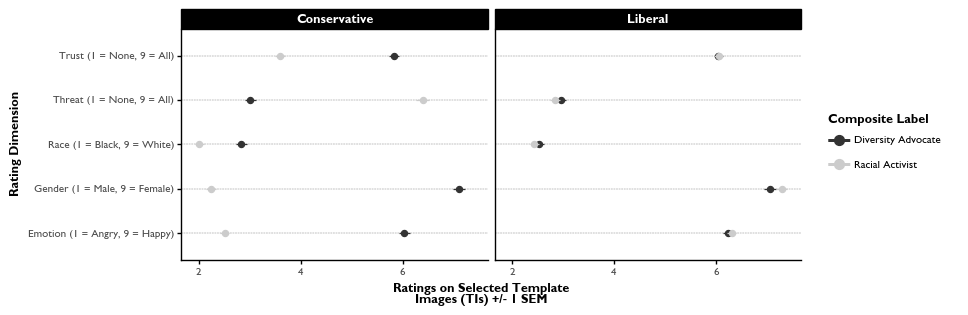

<ggplot: (114140829241)>

In [46]:
# Use plotnine package to plot our summaryData, using ggplot2 (R) style ...

ratingsList1 = ['Emotion (1 = Angry, 9 = Happy)',
                'Gender (1 = Male, 9 = Female)',
                'Race (1 = Black, 9 = White)',
                'Threat (1 = None, 9 = All)',
                'Trust (1 = None, 9 = All)']
ratingsList2 = ['Appropriateness\n(1 = Not at all,\n9 = Very)',
                'Likelihood of Supporting\n(1 = Very Unlikely,\n9 = Very Likely)',
                'Likelihood of Joining\n(1 = Very Unlikely,\n9 = Very Likely)']

summaryData1 = summaryData.loc[summaryData['RatingDim'].isin(ratingsList1), :]
summaryData2 = summaryData.loc[summaryData['RatingDim'].isin(ratingsList2), :]

(ggplot(summaryData1, aes(x='factor(RatingDim)', y='Choice_mean', color='factor(Label)')) 
 + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=0.5)
 + facet_wrap('~ PolAff', nrow=1)
 + labs(color='Composite Label',
        x='Rating Dimension',
        y = 'Ratings on Selected Template\nImages (TIs) +/- 1 SEM')
 + theme_classic()
 + coord_flip()
 + scale_color_grey()
 + theme(figure_size = (8, 3),
         text = element_text(family='Gill Sans MT'),
         axis_text_x = element_text(size=8),
         axis_title_x = element_text(size=9, weight='bold'),
         axis_text_y = element_text(size=8),
         axis_title_y = element_text(size=9, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         legend_position = 'right',
         legend_title = element_text(size=9, weight='bold'),
         legend_text = element_text(size=8),
         strip_text_x = element_text(size=9, weight='bold', color='white'), 
         strip_background = element_rect(fill='black'),
         panel_grid_major_y = element_line(color='gray', size=0.35, linetype='dashed')))

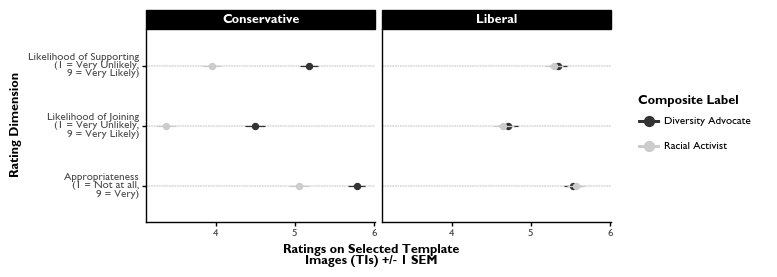

<ggplot: (-9223371922713899751)>

In [47]:
(ggplot(summaryData2, aes(x='factor(RatingDim)', y='Choice_mean', color='factor(Label)')) 
 + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=0.5)
 + facet_wrap('~ PolAff', nrow=1)
 + labs(color='Composite Label',
        x='Rating Dimension',
        y = 'Ratings on Selected Template\nImages (TIs) +/- 1 SEM')
 + theme_classic()
 + coord_flip()
 + scale_color_grey()
 + theme(figure_size = (6, 2.5),
         text = element_text(family='Gill Sans MT'),
         axis_text_x = element_text(size=8),
         axis_title_x = element_text(size=9, weight='bold'),
         axis_text_y = element_text(size=8),
         axis_title_y = element_text(size=9, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         legend_position = 'right',
         legend_title = element_text(size=9, weight='bold'),
         legend_text = element_text(size=8),
         strip_text_x = element_text(size=9, weight='bold', color='white'), 
         strip_background = element_rect(fill='black'),
         panel_grid_major_y = element_line(color='gray', size=0.35, linetype='dashed')))